In [3]:
import pandas as pd

df_analyza = pd.read_csv("kristynabasusova_zdrojova_data.csv")

In [4]:
df_analyza.head()

,Unnamed: 0,Nazev,Dispozice,Plocha_v_m2,Cena_v_czk,Url,Mesto,Ulice
0,0,Pronájem bytu 3+1 67 m²,3+1,67,19000,https://www.sreality.cz/detail/pronajem/byt/3+...,Nymburk,Letců R. A. F.
1,1,Pronájem bytu 4+1 88 m²,4+1,88,21000,https://www.sreality.cz/detail/pronajem/byt/4+...,Nymburk,Dlabačova
2,2,Pronájem bytu 3+kk 76 m²,3+kk,76,25000,https://www.sreality.cz/detail/pronajem/byt/3+...,Nymburk,V Kolonii
3,3,Pronájem bytu 4+kk 70 m²,4+kk,70,19900,https://www.sreality.cz/detail/pronajem/byt/4+...,Nymburk,Sadová
4,4,Pronájem bytu 2+kk 40 m²,2+kk,40,14000,https://www.sreality.cz/detail/pronajem/byt/2+...,Nymburk,Karla Čapka


In [5]:
df_analyza = df_analyza.rename(columns={"Unnamed: 0": "Id_nabidky"})

In [6]:
df_analyza.head()

,Id_nabidky,Nazev,Dispozice,Plocha_v_m2,Cena_v_czk,Url,Mesto,Ulice
0,0,Pronájem bytu 3+1 67 m²,3+1,67,19000,https://www.sreality.cz/detail/pronajem/byt/3+...,Nymburk,Letců R. A. F.
1,1,Pronájem bytu 4+1 88 m²,4+1,88,21000,https://www.sreality.cz/detail/pronajem/byt/4+...,Nymburk,Dlabačova
2,2,Pronájem bytu 3+kk 76 m²,3+kk,76,25000,https://www.sreality.cz/detail/pronajem/byt/3+...,Nymburk,V Kolonii
3,3,Pronájem bytu 4+kk 70 m²,4+kk,70,19900,https://www.sreality.cz/detail/pronajem/byt/4+...,Nymburk,Sadová
4,4,Pronájem bytu 2+kk 40 m²,2+kk,40,14000,https://www.sreality.cz/detail/pronajem/byt/2+...,Nymburk,Karla Čapka


In [7]:
df_analyza.shape

(11, 8)

In [8]:
#1. Jaká je průměrná cena bytů?

# průměr je 17163.64 CZK
# medián je 16 000 CZK

prumerna_cena = df_analyza["Cena_v_czk"].mean()

prumerna_cena

np.float64(17163.636363636364)

In [9]:
round(df_analyza["Cena_v_czk"].mean(),2)

np.float64(17163.64)

In [10]:
df_analyza["Cena_v_czk"].median()

16000.0

In [11]:
#2. Jaká je průměrná cena bytů pro každou dispozici (i graf)

prumerna_cena_dispozice = (
    df_analyza
    .groupby("Dispozice")["Cena_v_czk"]
    .mean()
)

prumerna_cena_dispozice 

Dispozice
1+kk        10900.0
2+kk        15500.0
3+1         17500.0
3+kk        25000.0
4+1         21000.0
4+kk        19900.0
atypicky    15000.0
Name: Cena_v_czk, dtype: float64

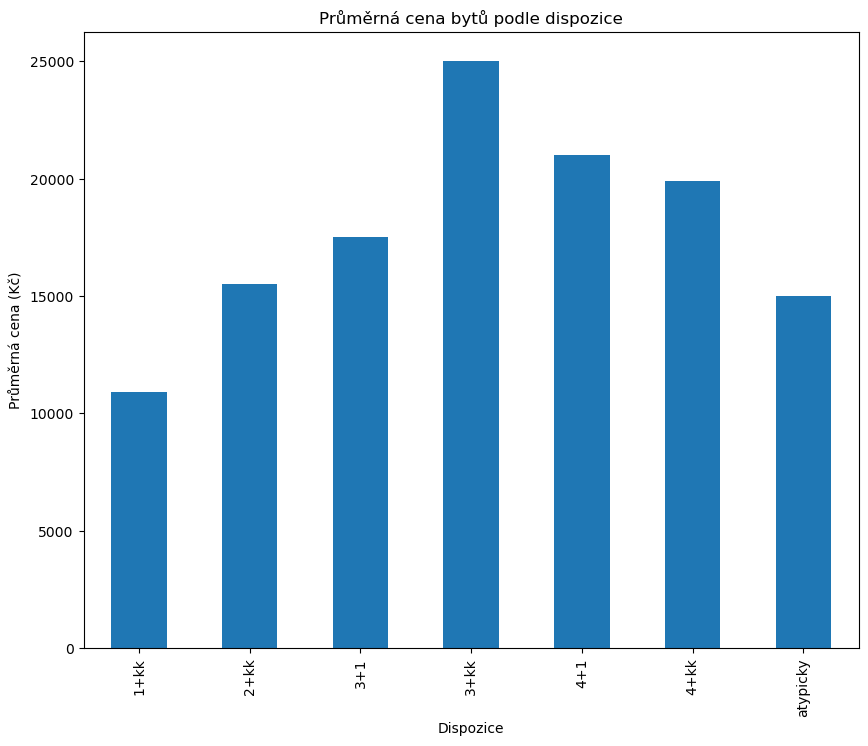

In [12]:
#GRAF

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

prumerna_cena_dispozice.plot(kind="bar")

plt.xlabel("Dispozice")
plt.ylabel("Průměrná cena (Kč)")
plt.title("Průměrná cena bytů podle dispozice")

plt.show()


In [13]:
#3. Jaká je průměrná velikost bytu pro každou dispozici? Zobrazte i na grafu.

prumerna_plocha_dispozice = (
    df_analyza
    .groupby("Dispozice")["Plocha_v_m2"]
    .mean()
)

prumerna_plocha_dispozice

Dispozice
1+kk        32.00
2+kk        43.75
3+1         61.00
3+kk        76.00
4+1         88.00
4+kk        70.00
atypicky    33.00
Name: Plocha_v_m2, dtype: float64

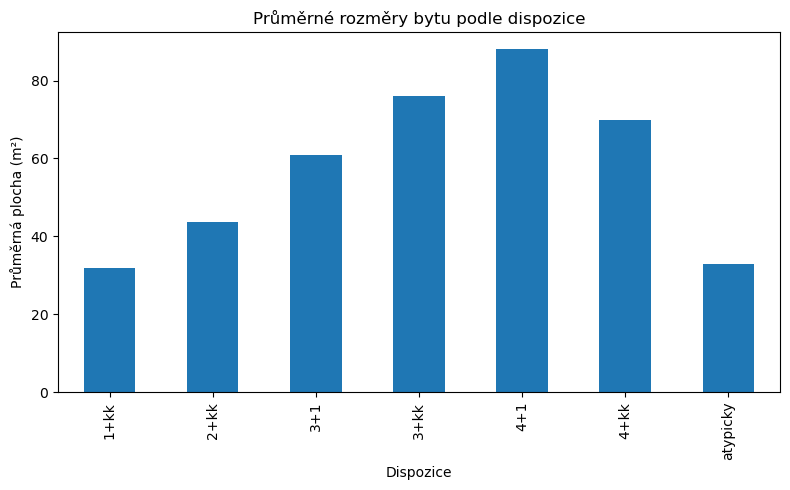

In [14]:
#GRAF 

plt.figure(figsize=(8, 5))

prumerna_plocha_dispozice.plot(kind="bar")

plt.xlabel("Dispozice")
plt.ylabel("Průměrná plocha (m²)")
plt.title("Průměrné rozměry bytu podle dispozice")

plt.tight_layout()
plt.show()


In [15]:
#4. Existuje ulice, kde je vyšší koncentrace dražších bytů?

# V Nymburce není nějaká větší nabídka dražších bytů na konkrétní ulici 

#dražší byty - ty jsou určitě

drazsi_byty = df_analyza[df_analyza["Cena_v_czk"] > prumerna_cena]

drazsi_byty

,Id_nabidky,Nazev,Dispozice,Plocha_v_m2,Cena_v_czk,Url,Mesto,Ulice
0,0,Pronájem bytu 3+1 67 m²,3+1,67,19000,https://www.sreality.cz/detail/pronajem/byt/3+...,Nymburk,Letců R. A. F.
1,1,Pronájem bytu 4+1 88 m²,4+1,88,21000,https://www.sreality.cz/detail/pronajem/byt/4+...,Nymburk,Dlabačova
2,2,Pronájem bytu 3+kk 76 m²,3+kk,76,25000,https://www.sreality.cz/detail/pronajem/byt/3+...,Nymburk,V Kolonii
3,3,Pronájem bytu 4+kk 70 m²,4+kk,70,19900,https://www.sreality.cz/detail/pronajem/byt/4+...,Nymburk,Sadová
10,10,Pronájem bytu 2+kk 53 m²,2+kk,53,21000,https://www.sreality.cz/detail/pronajem/byt/2+...,Nymburk,K Lesu


In [16]:
#vyšší počet dražších bytů na ulici - není 

pocet_drazsich_na_ulici = (
    drazsi_byty
    .groupby("Ulice")
    .size()
    .sort_values(ascending=False)
)

pocet_drazsich_na_ulici


Ulice
Dlabačova         1
K Lesu            1
Letců R. A. F.    1
Sadová            1
V Kolonii         1
dtype: int64

In [17]:
#Jaký typ dispozice je v daném městě nejčastěji inzerován? Který to je? Proč myslíte, že tomu tak je? (Zobrazte na grafu - např. bar chart nebo pie chart)

pocet_dispozic = df_analyza["Dispozice"].value_counts()

pocet_dispozic


Dispozice
2+kk        4
3+1         2
4+1         1
3+kk        1
4+kk        1
atypicky    1
1+kk        1
Name: count, dtype: int64

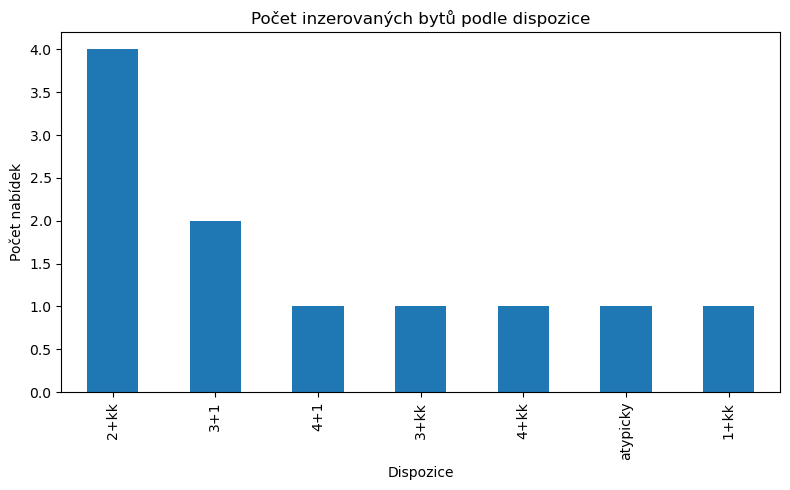

In [18]:
plt.figure(figsize=(8, 5))

pocet_dispozic.plot(kind="bar")

plt.xlabel("Dispozice")
plt.ylabel("Počet nabídek")
plt.title("Počet inzerovaných bytů podle dispozice")

plt.tight_layout()
plt.show()

In [19]:
# Závěr

nejcastejsi_dispozice = pocet_dispozic.idxmax()
nejcastejsi_pocet = pocet_dispozic.max()

print(f"Nejčastěji inzerovaná dispozice je {nejcastejsi_dispozice} ({nejcastejsi_pocet} nabídek)")


Nejčastěji inzerovaná dispozice je 2+kk (4 nabídek)


In [20]:
# Nejčastější je 2KK. 
# pravděpodobně to vychází z celkové situace v ČR - 
# nejvíce se staví menší byty, které jsou levnější na koupi i pronájem.
# Těch větších bytů obecně v nabídkách bývá o něco méně a jsou celkem drahé. 
# Plus možná to souvisí s tím, že v ČR lidé hodně lpí na vlastnictví nemovistostí
# - v nájmu jsou jen dokud si nepostaví dům, nekoupí vlastní větší byt. 

In [21]:
#6.Existují zde inzerce bytů, které stojí více než 20.000,- Kč? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?

byty_nad_20000 = df_analyza[df_analyza["Cena_v_czk"] > 20000]

byty_nad_20000

,Id_nabidky,Nazev,Dispozice,Plocha_v_m2,Cena_v_czk,Url,Mesto,Ulice
1,1,Pronájem bytu 4+1 88 m²,4+1,88,21000,https://www.sreality.cz/detail/pronajem/byt/4+...,Nymburk,Dlabačova
2,2,Pronájem bytu 3+kk 76 m²,3+kk,76,25000,https://www.sreality.cz/detail/pronajem/byt/3+...,Nymburk,V Kolonii
10,10,Pronájem bytu 2+kk 53 m²,2+kk,53,21000,https://www.sreality.cz/detail/pronajem/byt/2+...,Nymburk,K Lesu


In [22]:
#počet všech bytů nad 20 000 Kč

len(byty_nad_20000)


3

In [23]:
max_dvoupokojove_byty = ['1+kk','1+1','2+kk','2+1']
drahe_dvoupokojove = byty_nad_20000[
    byty_nad_20000["Dispozice"].isin(max_dvoupokojove_byty)
]

drahe_dvoupokojove


,Id_nabidky,Nazev,Dispozice,Plocha_v_m2,Cena_v_czk,Url,Mesto,Ulice
10,10,Pronájem bytu 2+kk 53 m²,2+kk,53,21000,https://www.sreality.cz/detail/pronajem/byt/2+...,Nymburk,K Lesu


In [24]:
#počet drahých dvoupokojových bytů 

len(drahe_dvoupokojove)

#V nabídce v Nymburce existuje 1 maximálně dvoupokojový byt s cenou nad 20 000 Kč. 


1

In [26]:
#Zjištěte minimální a maximální cenu inzerce pro každou dispozici bytu. Která dispozice má největší rozptyl mezi minimální a maximální inzerovanou cenou? (Zobrazte i na grafu)

ceny_dispozice = (
    df_analyza
    .groupby("Dispozice")["Cena_v_czk"]
    .agg(
        min_cena="min",
        max_cena="max"
    )
)

ceny_dispozice


,min_cena,max_cena
Dispozice,,
1+kk,10900,10900
2+kk,13000,21000
3+1,16000,19000
3+kk,25000,25000
4+1,21000,21000
4+kk,19900,19900
atypicky,15000,15000


In [27]:
#největší rozptyl 

ceny_dispozice["rozptyl_ceny"] = (
    ceny_dispozice["max_cena"] - ceny_dispozice["min_cena"]
)

ceny_dispozice



,min_cena,max_cena,rozptyl_ceny
Dispozice,,,
1+kk,10900,10900,0
2+kk,13000,21000,8000
3+1,16000,19000,3000
3+kk,25000,25000,0
4+1,21000,21000,0
4+kk,19900,19900,0
atypicky,15000,15000,0


In [28]:
nejvetsi_rozptyl = ceny_dispozice["rozptyl_ceny"].idxmax()
hodnota_rozptylu = ceny_dispozice["rozptyl_ceny"].max()

print(
    f"Největší rozptyl cen má dispozice {nejvetsi_rozptyl} "
    f"({hodnota_rozptylu} Kč)"
)


Největší rozptyl cen má dispozice 2+kk (8000 Kč)


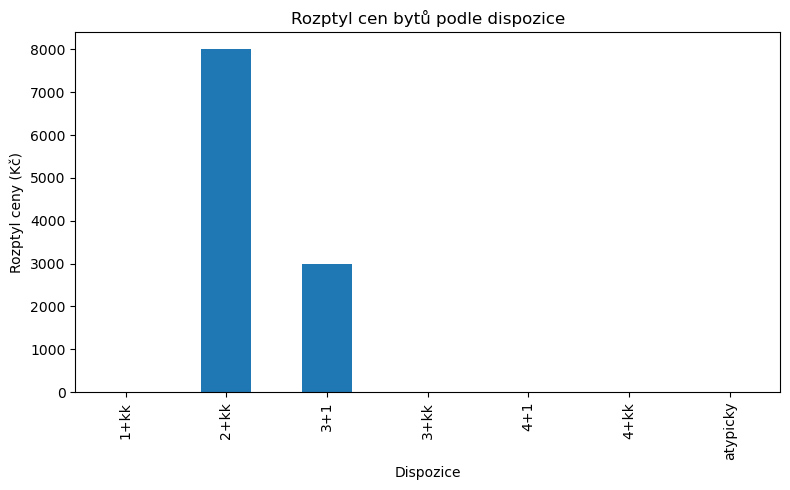

In [29]:
plt.figure(figsize=(8, 5))

ceny_dispozice["rozptyl_ceny"].plot(kind="bar")

plt.xlabel("Dispozice")
plt.ylabel("Rozptyl ceny (Kč)")
plt.title("Rozptyl cen bytů podle dispozice")

plt.tight_layout()
plt.show()


In [30]:
# Odpověď: Největší rozptyl má dispozice 2KK a v nabídce v Nymburce mají rozptyl jen dispozice bytů 2kk a 3+1 protože je zde bytů v nabídce velmi málo. 